## Importing packages

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Matplotlib Configuration

In [274]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

## Reading Data

In [244]:
df = pd.read_excel("./ToyotaCorolla.xls", "data", index_col=0)
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


## One-hot Encoding


In [163]:
one_hot_columns = ["Fuel_Type", "Color"]
for column in one_hot_columns:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
df.drop(columns=one_hot_columns, inplace=True)

In [164]:
df.drop(columns=["Model"], inplace=True)
df.shape

(1436, 48)

## Normalization

In [165]:
# MinMax Normalization for better performance
df = (df - df.min()) / (df.max() - df.min())

In [166]:
df.isna().sum()

Price                   0
Age_08_04               0
Mfg_Month               0
Mfg_Year                0
KM                      0
HP                      0
Met_Color               0
Automatic               0
CC                      0
Doors                   0
Cylinders            1436
Gears                   0
Quarterly_Tax           0
Weight                  0
Mfr_Guarantee           0
BOVAG_Guarantee         0
Guarantee_Period        0
ABS                     0
Airbag_1                0
Airbag_2                0
Airco                   0
Automatic_airco         0
Boardcomputer           0
CD_Player               0
Central_Lock            0
Powered_Windows         0
Power_Steering          0
Radio                   0
Mistlamps               0
Sport_Model             0
Backseat_Divider        0
Metallic_Rim            0
Radio_cassette          0
Parking_Assistant       0
Tow_Bar                 0
CNG                     0
Diesel                  0
Petrol                  0
Beige       

In [167]:
df.fillna(0, inplace=True)

In [168]:
df.isna().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
HP                   0
Met_Color            0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
CNG                  0
Diesel               0
Petrol               0
Beige                0
Black                0
Blue                 0
Green                0
Grey                 0
Red        

## Train Validation Test Split

In [169]:
def train_validation_test_split(df, train_size, validation_size, test_size):
    train = df.sample(frac=train_size, random_state=0)
    df.drop(train.index, inplace=True)
    print("train_size:", train.shape)
    validation_size = (validation_size) / (validation_size + test_size)
    validation = df.sample(frac=validation_size, random_state=0)
    df.drop(validation.index, inplace=True)
    print("validation_size:", validation.shape)
    test = df
    print("test_size:", test.shape)
    return train, validation, test

In [170]:
train_size, validation_size, test_size = 0.7, 0.15, 0.15
train, validation, test = train_validation_test_split(df.copy(), train_size, validation_size, test_size)

train_size: (1005, 48)
validation_size: (216, 48)
test_size: (215, 48)


In [171]:
y_train = train["Price"].to_numpy()
X_train = train.drop("Price", axis=1).to_numpy()

y_validation = validation["Price"].to_numpy()
X_validation = validation.drop("Price", axis=1).to_numpy()

y_test = test["Price"].to_numpy()
X_test = test.drop("Price", axis=1).to_numpy()

## Plot Function

In [267]:
def plotting(validation_loss, test_loss, method):
    plt.plot(validation_loss, label='validation loss')
    plt.plot(test_loss, label='test loss')
    plt.title("{}: Loss of {} iteration with eta {}".format(method, iterations_no, eta))
    plt.legend()
    plt.show()

## Constant Values

In [299]:
# iterations = np.arange(50, 500, 50)
# etas = np.arange(0.0001, 0.001, 0.0001)
# batch_sizes = np.arange(20, 200, 10)
eta, batch_size, iterations_no = 0.0001, 20, 1000



## 1. Stochastic Gradient Descent

$$
w^{i +1} = w^{i} + \eta(t_n - w^{(i)T} \phi_n)\phi_n
$$

In [300]:
def SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE = (np.sum(selected_y_train - selected_X_train.dot(w))**2)/2
        validation_SSE = (np.sum(y_validation - X_validation.dot(w))**2)/2
        test_SSE = (np.sum(y_test - X_test.dot(w))**2)/2 
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        w += eta * (selected_y_train - selected_X_train.dot(w)).dot(selected_X_train)
    return train_loss, validation_loss, test_loss, w

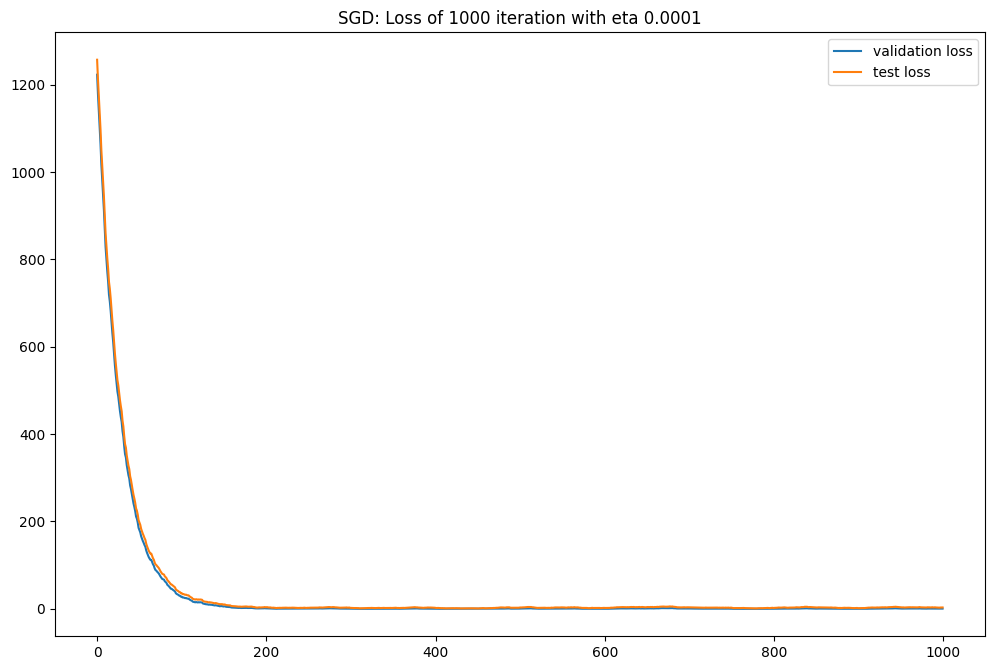

In [301]:
train_loss, validation_loss, test_loss, w = SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)
plotting(validation_loss, test_loss, "SGD")

In [314]:
np.subtract(validation_loss, test_loss)

array([-34.21530531, -33.85382062, -33.44938883, -33.19076824,
       -32.98674934, -32.6591216 , -32.18603457, -31.85442341,
       -31.5835752 , -31.32531951, -30.93384892, -30.47684047,
       -30.09491895, -29.72115588, -29.39804984, -29.10986025,
       -28.85798122, -28.48849403, -28.22122242, -27.90948062,
       -27.55375599, -27.22112769, -26.95165404, -26.62653315,
       -26.20490644, -25.98197074, -25.61767223, -25.18879623,
       -24.87356958, -24.66766236, -24.18875253, -23.94710048,
       -23.47460473, -23.0296838 , -22.7783724 , -22.3161843 ,
       -22.02143641, -21.71628471, -21.52017868, -21.04964722,
       -20.83930857, -20.37609471, -20.05139919, -19.69594233,
       -19.42220525, -19.0765771 , -18.64373899, -18.47441932,
       -18.17376058, -17.71108516, -17.50324965, -17.27514005,
       -16.91660677, -16.69659341, -16.47748919, -16.28479898,
       -16.03599563, -15.85700818, -15.38602005, -15.07452246,
       -14.86509983, -14.6444487 , -14.48189764, -14.34

## 2. Ridge Regression

In [302]:
def SGD_Regularized(lambda_, X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE =( (np.sum(selected_y_train - selected_X_train.dot(w))**2)  + (lambda_) * np.sum(w.T.dot(w)))/2
        validation_SSE = ((np.sum(y_validation - X_validation.dot(w))**2)  + (lambda_) * np.sum(w.T.dot(w)))/2
        test_SSE = ((np.sum(y_test - X_test.dot(w))**2) + (lambda_) * np.sum(w.T.dot(w)))/2 
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        w += eta * ((selected_y_train - selected_X_train.dot(w)).dot(selected_X_train) - w)
    return train_loss, validation_loss, test_loss, w

In [303]:
l1_train_loss, l1_validation_loss, l1_test_loss, w = SGD_Regularized(1, X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)

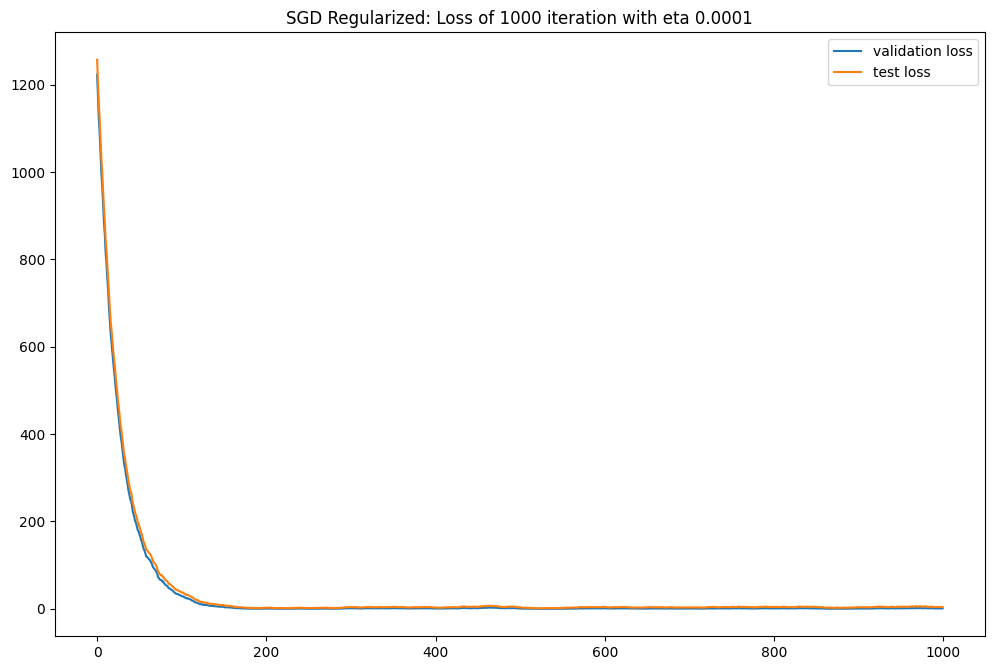

In [304]:
plotting(l1_validation_loss, l1_test_loss, "SGD Regularized")

In [313]:
np.subtract(l1_validation_loss, l1_test_loss)

array([-34.21530531, -33.9385437 , -33.79409411, -33.48178555,
       -33.26447744, -32.94224635, -32.5734246 , -32.16989863,
       -31.8566364 , -31.52684018, -30.96630337, -30.65919855,
       -30.32109719, -29.90734755, -29.53376212, -28.99965212,
       -28.66951728, -28.39157034, -28.04088395, -27.67766724,
       -27.19310843, -26.87534628, -26.50299797, -26.02795213,
       -25.66763453, -25.27388794, -24.9448232 , -24.59375658,
       -24.25613303, -23.93560776, -23.64855193, -23.16408165,
       -22.71353668, -22.52220726, -22.20114221, -21.87135351,
       -21.52462529, -21.18425351, -20.93568596, -20.65355959,
       -20.48850814, -20.23708671, -19.71814227, -19.49636264,
       -19.17075586, -18.89074126, -18.75226141, -18.39803239,
       -18.05746917, -17.93068276, -17.67125761, -17.42619736,
       -17.11365628, -16.91901338, -16.48868971, -16.07642949,
       -15.89170753, -15.52616165, -15.18469042, -15.14114889,
       -15.00739262, -14.84846763, -14.74287111, -14.63

## 3. $$||Y - XW||_1$$

In [305]:
def SGD_norm1(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE = np.sum(np.abs(selected_y_train - selected_X_train.dot(w)))/2
        validation_SSE = np.sum(np.abs(y_validation - X_validation.dot(w)))/2
        test_SSE = np.sum(np.abs(y_test - X_test.dot(w)))/2
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        gradient = selected_X_train
        gradient[(selected_y_train - selected_X_train.dot(w)) < 0] = gradient[(selected_y_train - selected_X_train.dot(w)) < 0] * (-1)
        gradient = np.sum(gradient, axis=0)
        w += eta * gradient
    return train_loss, validation_loss, test_loss, w

In [306]:
n1_train_loss, n1_validation_loss, n1_test_loss, w = SGD_norm1(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)

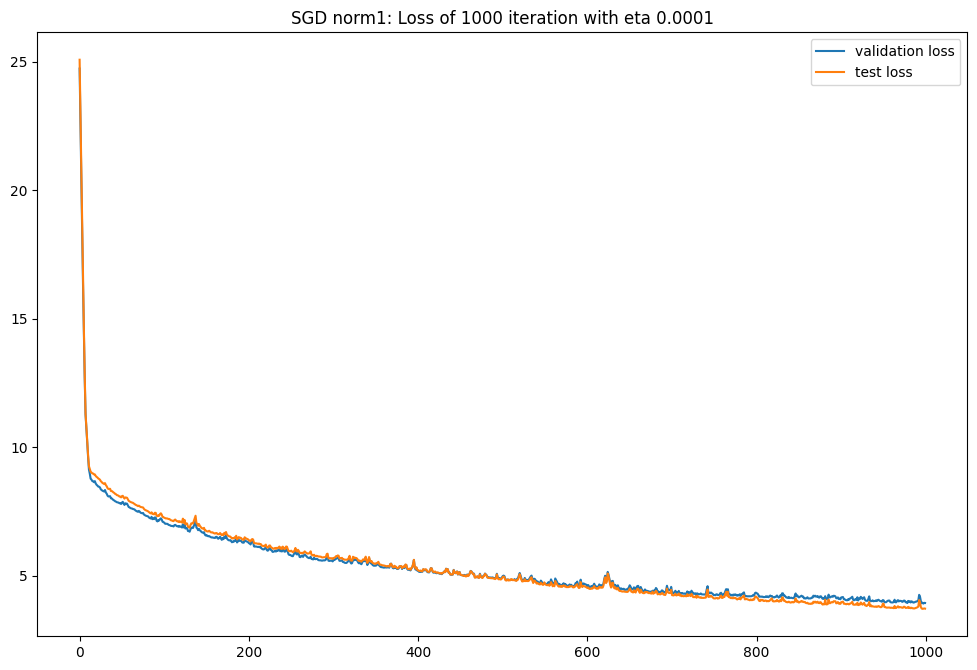

In [307]:
plotting(n1_validation_loss, n1_test_loss, "SGD norm1")

In [312]:
np.subtract(n1_validation_loss, n1_test_loss)

array([-3.43534636e-01, -3.50119334e-01, -3.48265904e-01, -3.45857615e-01,
       -3.44672503e-01, -2.74779538e-01, -1.64297067e-01, -4.62961818e-02,
       -1.28544138e-02, -4.96765584e-02, -7.13407618e-02, -1.26049520e-01,
       -1.79544721e-01, -2.72594825e-01, -2.77950003e-01, -2.98762805e-01,
       -3.02956537e-01, -3.00625683e-01, -2.60532641e-01, -2.91970746e-01,
       -3.06849864e-01, -3.14825630e-01, -3.17372558e-01, -3.00564413e-01,
       -3.01198265e-01, -3.16817289e-01, -3.16811808e-01, -3.01252035e-01,
       -2.98913956e-01, -2.90814920e-01, -2.66430406e-01, -2.86279396e-01,
       -2.90720615e-01, -2.92648487e-01, -2.90987523e-01, -2.86506750e-01,
       -2.86557928e-01, -2.84179292e-01, -2.87832791e-01, -2.98670926e-01,
       -2.96346477e-01, -2.93176159e-01, -2.85961708e-01, -2.87834437e-01,
       -2.75742449e-01, -2.75543914e-01, -2.66267328e-01, -2.60270851e-01,
       -2.58085206e-01, -2.56674510e-01, -2.51375138e-01, -2.34275249e-01,
       -2.41853003e-01, -

## 4. 